## Quantum Uncertainty in the Harmonic Oscillator

In this lab I will explore calculating the quantum mechanical observables of the 1D harmonic oscillator. Below are the formulae for the wavefunction of the n-th energy level of the 1D harmonic oscillator, the n-th Hermite polynomial used in calculating the wavefunction, their derivatives, position and momentum uncertainty, and total energy of the oscillator.

\begin{gather*}
\psi_N(x) = \frac{1}{\sqrt{2^nn!\sqrt{\pi}}}e^{-x^2/2}H_n(x) \\
H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x) \\
\frac{dH_n(x)}{dx} = 2nH_{n-1}(x) \\
\frac{\psi_n(x)}{dx} = \frac{1}{\sqrt{2^nn!\sqrt{\pi}}}e^{-x^2/2}(-xH_n(x) + 2nH_{n-1}(x)) \\
\langle x^2 \rangle = \int_{-\infty}^{\infty}x^2|\psi_n(x)|^2dx \\
\langle p^2 \rangle = \int_{-\infty}^{\infty} \left| \frac{d\psi_n(x)}{dx} \right|^2 dx \\
E = \frac{1}{2}(\langle{x^2}\rangle + \langle{p^2}\rangle)
\end{gather*}

In [1]:
def H(n, x):
    hlast, hn = 0., 1.
    for i in range(n):
        hlast, hn = hn, 2*x*hn - 2*i*hlast
    return hn

In [2]:
from numpy import exp, pi, sqrt
from math import factorial

def psi(n, x):
    return exp(-x**2/2.)*H(n, x)/sqrt(float(2**n)*float(factorial(n))*sqrt(pi))

In [3]:
def dpsidx(n, x):
    return exp(-x**2/2.)*(-x*H(n, x) + 2*n*H(n-1, x))/sqrt(float(2**n)*float(factorial(n))*sqrt(pi))

In [4]:
def fX(n, x):
    return (x*psi(n, x))**2

def fP(n, x):
    return dpsidx(n, x)**2

We will need to do a change of variables to evaluate the improper integrals for position and momentum uncertainty. Below $z = \frac{x}{1+x}$ is used.

In [5]:
def gX(n, z):
    return fX(n, z/(1-z))/(1-z)**2

def gP(n, z):
    return fP(n, z/(1-z))/(1-z)**2

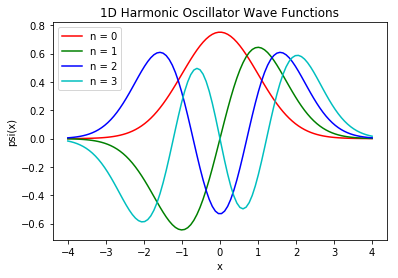

In [6]:
from pylab import figure, plot, xlabel, ylabel, title, legend, show
from numpy import linspace

x = linspace(-4, 4, 100)
lgd = []

figure(1)
for (n, color) in zip(range(4), ('r', 'g', 'b', 'c')):
    plot(x, psi(n, x), color)
    lgd.append('n = ' + str(n))
xlabel('x'), ylabel('psi(x)')
title('1D Harmonic Oscillator Wave Functions')
legend(lgd)
show()

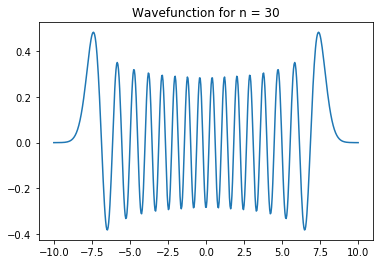

In [7]:
x = linspace(-10, 10, 500)

figure(2)
plot(x, psi(30, x))
title('Wavefunction for n = 30')
show()

In [8]:
from gaussxw import gaussxwab
from numpy import zeros
from pandas import DataFrame

N = 100
x, w = gaussxwab(N, 0., 1.)

X, p, E = zeros(16), zeros(16), zeros(16)
for n in range(16):
    I = 0.
    for i in range(N):
        I += w[i]*gX(n, x[i])
    X[n] = 2*I
    
    I = 0.
    for i in range(N):
        I += w[i]*gP(n, x[i])
    p[n] = 2*I
    
    E[n] = (X[n] + p[n])/2.
    
df = DataFrame(data={'x':sqrt(X), 'p':sqrt(p), 'E':E})
df.index.name = 'n'
print(df)

       E         p         x
n                           
0    0.5  0.707107  0.707107
1    1.5  1.224745  1.224745
2    2.5  1.581139  1.581139
3    3.5  1.870829  1.870829
4    4.5  2.121320  2.121320
5    5.5  2.345208  2.345208
6    6.5  2.549510  2.549510
7    7.5  2.738613  2.738613
8    8.5  2.915476  2.915476
9    9.5  3.082207  3.082207
10  10.5  3.240370  3.240370
11  11.5  3.391165  3.391165
12  12.5  3.535534  3.535534
13  13.5  3.674235  3.674235
14  14.5  3.807887  3.807887
15  15.5  3.937004  3.937004
